#### Simple Absorption with $K_{ya}'=200 \frac{kmol}{hr \,m^3}$ and L and G are assumed constant

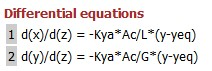
at $z=0$ $y_{in}=0.04$ and $x_{out}=\text{you calculate from operating line}$

In the secant method we will make 2 guesses of the value of $ v_x |_{r=0}$.  The error will be calculated after integrating and at $r=R$ the value of $v_x$ should be zero. 
$$err(v_{x_{k}})=\left. v_x \right|_{r=R}-0$$ 
Remember from C&S6.4a that the <b>secant method </b>is just a <b>linear interpolation between pairs of points </b>.  
In this case the pairs of points are the $( v_x |_{r=0}$,$ v_x |_{r=R}$) or $(y_0, err( y_0 ))$

$$y_{0_{k+1}}=y_{0_k}-err(y_{0_k})$$
$$y_{0_{k+1}}=y_{0_k}-err(y_{0_k})\frac{ y_{0_k}-y_{0_{k-1}} } {err(y_{0_k})-err(y_{0_{k-1}})}$$
Two initial values or guesses of y_0 are needed.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt


In [3]:
 def ODEfun(z,Yfuncvec):
    x = Yfuncvec[0] 
    y = Yfuncvec[1] 
     
    G = 57.8 #kmol/hr
    pi = math.pi
    Ac = pi/4*(0.747)**2 #m^2
    L = 68 #kmol/hr
    yeq =  0.8028*x  #
    Kya = 200 #kmol/(hr m3 mol frac)


    
    dxdz = -Kya*Ac/L*(y-yeq)
    dydz = -Kya*Ac/G*(y-yeq) 
 
    dYfuncvecdz = [dxdz, dydz] 
    return dYfuncvecdz

In [7]:
#test of function ODEfun
tspan = [0,3] # Range for the independent variable z 
y0 = [0.029, 0.04] # Initial values for the dependent variables, x and y at z=0
sol=ODEfun(0,y0)
print (sol)

[-0.02155049601341793, -0.02535352472166815]


In [36]:
#input the first 2 guesses for the secant method for the height of the column
#How about 2m and 3m?
tspan = [0,3] # Range for the independent variable z starting at 0 and going to h of the column 
y0 = [0.029, 0.04] # Initial values for the dependent variables x and y

sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE 
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.10833159, 1.1916475 , 2.93683785, 3.        ])
 t_events: None
        y: array([[ 0.029     ,  0.02672526,  0.00946078, -0.00486434, -0.00519029],
       [ 0.04      ,  0.03732384,  0.01701268,  0.0001596 , -0.00022387]])
 y_events: None


In [33]:
#Test Cell for xin=0  The interpolation is based on a new h value and checking either x or y at the top of the column
#So y0 never changes.  Instead we will make an vector of h values that change.
 
y0 = [0.029, 0.04] # Initial values for the dependent variables x and y
#initialize arrays
hNEW=np.zeros(21)
f=np.zeros(21)
#input the first 2 guesses for the secant method
hNEW[0]=2
hNEW[1]=3


k=0 #python starts arrays at 0
tspan = [0,hNEW[k]] # Range for the independent variable

sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE with first Qx
f[k] = sol.y[0,-1] #for this column the last x value should be zero! 
print('   Trial    h       x_in        yout')
print('   {:d}  {:8.3f}   {:8.4f}       {:6.4f}'.format(k+1, hNEW[k], sol.y[0,-1],sol.y[1,-1]))

k=1
tspan = [0,hNEW[k]] # Range for the independent variable
sol=solve_ivp(ODEfun,tspan,y0)#solve the ODE with second y0
f[k] = sol.y[0,-1]
print('   {:d}  {:8.3f}   {:8.4f}       {:6.4f}'.format(k+1, hNEW[k], sol.y[0,-1],sol.y[1,-1]))
err=np.abs(f[k])

while (err>1e-6 and k<20): #multiple iterations to get err<1e-6
    hNEW[k+1]= hNEW[k]-f[k]*(hNEW[k]-hNEW[k-1])/(f[k]-f[k-1])
    tspan= [0,hNEW[k+1]]
    sol=solve_ivp(ODEfun,tspan,y0)
    f[k+1] = sol.y[0,-1]
    print('   {:d}  {:8.5f}    {:8.4e}   {:6.4f}'.format(k+2, hNEW[k+1], sol.y[0,-1], sol.y[1,-1]))
    err=np.abs(f[k+1])
    k=k+1

   Trial    h       x_in        yout
   1     2.000     0.0013       0.0075
   2     3.000    -0.0052       -0.0002
   3   2.20432    -2.6746e-04   0.0056
   4   2.16109    5.8098e-05   0.0060
   5   2.16880    -4.9855e-07   0.0059


In [34]:
#printing of the results
teval=np.linspace(tspan[0],tspan[1],20)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval)

print('                     Summary of Results\n')
print('   z             x           y         ystar   ')
print('  (m)        (mol frac)  (mol frac)  (mol frac)   ')
ystar=np.zeros(20)
row=0
for row in range(20):
    ystar[row]=0.8028*sol.y[0][row]
    print('{:4.4e} {:10.4f} {:10.4f}  {:10.4f} '.format(sol.t[row],
                    sol.y[0][row],sol.y[1][row] ,ystar[row]))



                     Summary of Results

   z             x           y         ystar   
  (m)        (mol frac)  (mol frac)  (mol frac)   
0.0000e+00     0.0290     0.0400      0.0233 
1.1415e-01     0.0266     0.0372      0.0214 
2.2830e-01     0.0243     0.0345      0.0195 
3.4244e-01     0.0222     0.0320      0.0178 
4.5659e-01     0.0202     0.0296      0.0162 
5.7074e-01     0.0182     0.0273      0.0146 
6.8489e-01     0.0164     0.0252      0.0132 
7.9903e-01     0.0147     0.0232      0.0118 
9.1318e-01     0.0131     0.0213      0.0105 
1.0273e+00     0.0115     0.0195      0.0093 
1.1415e+00     0.0101     0.0177      0.0081 
1.2556e+00     0.0087     0.0161      0.0070 
1.3698e+00     0.0074     0.0146      0.0059 
1.4839e+00     0.0062     0.0131      0.0049 
1.5981e+00     0.0050     0.0117      0.0040 
1.7122e+00     0.0039     0.0104      0.0031 
1.8264e+00     0.0028     0.0092      0.0023 
1.9405e+00     0.0018     0.0080      0.0015 
2.0547e+00     0.0009     0.0069

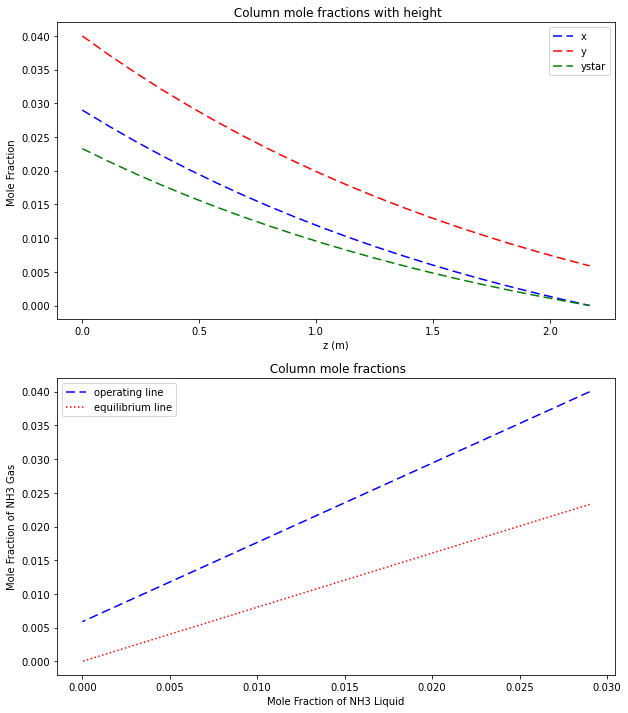

In [35]:
#plot the data

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='x',dashes=[6, 3])
plt.plot(sol.t,sol.y[1],'r',label='y',dashes=[6, 3])
plt.plot(sol.t,ystar,'g',label='ystar',dashes=[6, 3])
plt.title(' Column mole fractions with height')
plt.xlabel('z (m)')
plt.ylabel('Mole Fraction ')
plt.legend()

plt.subplot (2,1,2)
plt.plot(sol.y[0],sol.y[1],'b',label='operating line',dashes=[6, 3])
plt.plot(sol.y[0],ystar,':r', label='equilibrium line')
plt.title(' Column mole fractions')
plt.xlabel('Mole Fraction of NH3 Liquid')
plt.ylabel('Mole Fraction of NH3 Gas')
plt.legend()
